In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:\\digital_collect_train_2\\代码实现\\all.txt",sep=',',header=None)

In [3]:
fddata = data[16]

In [4]:
fddate = data[[2,19,23,25,17,18]]

In [86]:
fddate.isna().sum()

2     0
19    0
23    0
25    0
17    0
18    0
dtype: int64

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

//隐含层

In [6]:
def add_layer(input,in_size,out_size,activation_function=None):
    
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    Biases = tf.Variable(tf.zeros([1,out_size]))
    
    Wx_plus_b = tf.matmul(tf.cast(input,tf.float32),Weights) + Biases
    
    
    if activation_function is None:
        output = Wx_plus_b
    else:
        output = activation_function(Wx_plus_b)
    
    return output

构建数据

In [17]:


x = data[[2,19,23,25]]
y = data[[17]]
x_train = np.mat(x )
# x_b = np.ones((2955104,1))
# x_train = np.hstack((x_b,x_train))
y_train = np.mat(y)

# xs = tf.placeholder(tf.float32,[None,4])
# ys = tf.placeholder(tf.float32,[None,1])

In [8]:
x_train

matrix([[ 5.209e+01,  7.370e+02,  7.500e+00,  4.040e+00],
        [ 5.250e+01,  7.350e+02,  6.570e+00,  4.360e+00],
        [ 5.150e+01,  7.370e+02,  6.180e+00,  5.040e+00],
        ...,
        [ 6.500e+00,  0.000e+00,  1.600e-01, -1.113e+01],
        [ 6.500e+00,  0.000e+00,  1.800e-01, -1.281e+01],
        [ 6.500e+00,  0.000e+00,  7.900e-01, -1.710e+01]])

In [9]:
y_train

matrix([[ 0.  ],
        [ 0.  ],
        [-0.01],
        ...,
        [ 0.  ],
        [ 0.  ],
        [ 0.  ]])

构建神经网络

In [10]:
#构建第一层神经网络
l1 = add_layer(x_train,4,10,activation_function=tf.nn.sigmoid)

#构建第二层
#l2 = add_layer(l1,10,3,activation_function=tf.nn.relu)
#输出层
predition = add_layer(l1,10,1,activation_function=None)


Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
#均值平方差
loss = tf.reduce_mean(tf.reduce_sum(tf.square(y_train-predition),reduction_indices=[1]))

#构建优化器 梯度下降
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

#初始化变量
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

#
for i  in range(1,200):
    
    sess.run(train_step)
    if i%5==0:
        print('loss=',sess.run(loss))
                
predition_value = sess.run(predition)
#

predition_value = predition_value.reshape((-1))
#lines =ax.scatter(x_data,predition_value)
#plt.show()

In [67]:
print("predition=",predition_value.shape)

predition= (2955104,)


In [15]:
df3 = pd.read_csv('D:\\digital_collect_train_2\\代码实现\\loss.txt')

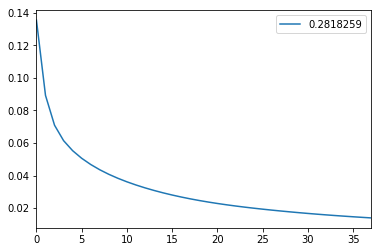

In [16]:
df3.plot()